In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('../data/processed/cleaned_data.csv')

print("="*60)
print("EXPLORATORY DATA ANALYSIS - IN-DEPTH")
print("="*60)
print(f"\nDataset: {df.shape[0]:,} students × {df.shape[1]} variables")
print(f"\nCleaned data loaded successfully")

print("\n" + "="*60)
print("MAIN FINDING (from previous analysis):")
print("="*60)
print("\nMean Exam Scores by Stress Level:")
print(df.groupby('StressCategory')['ExamScore'].mean().round(2))


EXPLORATORY DATA ANALYSIS - IN-DEPTH

Dataset: 12,469 students × 22 variables

Cleaned data loaded successfully

MAIN FINDING (from previous analysis):

Mean Exam Scores by Stress Level:
StressCategory
High      70.00
Low       71.90
Medium    69.74
Name: ExamScore, dtype: float64


In [2]:
print("="*60)
print("VARIABLE INVENTORY")
print("="*60)

print("\nAll variables in dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print("\nNumeric variables:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"{numeric_cols}")

print("\nCategorical variables:")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"{categorical_cols}")

print("\nKey variables for analysis:")
print("IV: StressLevel, StressCategory")
print("DV: ExamScore, FinalGrade")
print("Moderators: StudyHours, Attendance, Motivation, Gender, etc.")

VARIABLE INVENTORY

All variables in dataset:
   1. StudyHours
   2. Attendance
   3. Resources
   4. Extracurricular
   5. Motivation
   6. Internet
   7. Gender
   8. Age
   9. LearningStyle
  10. OnlineCourses
  11. Discussions
  12. AssignmentCompletion
  13. ExamScore
  14. EduTech
  15. StressLevel
  16. FinalGrade
  17. StressCategory
  18. PerformanceLevel
  19. HighPerformer
  20. StudyCategory
  21. EngagementScore
  22. EngagementLevel

Numeric variables:
['StudyHours', 'Attendance', 'Resources', 'Extracurricular', 'Motivation', 'Internet', 'Gender', 'Age', 'LearningStyle', 'OnlineCourses', 'Discussions', 'AssignmentCompletion', 'ExamScore', 'EduTech', 'StressLevel', 'FinalGrade', 'HighPerformer', 'EngagementScore']

Categorical variables:
['StressCategory', 'PerformanceLevel', 'StudyCategory', 'EngagementLevel']

Key variables for analysis:
IV: StressLevel, StressCategory
DV: ExamScore, FinalGrade
Moderators: StudyHours, Attendance, Motivation, Gender, etc.


In [3]:
print("="*60)
print("DESCRIPTIVE STATISTICS - NUMERIC VARIABLES")
print("="*60)

key_vars = ['ExamScore', 'FinalGrade', 'StressLevel']

for var in ['StudyHours', 'Attendance', 'Motivation', 'AssignmentCompletion']:
    if var in df.columns:
        key_vars.append(var)

print("\nSummary statistics:")
print(df[key_vars].describe().round(2))

DESCRIPTIVE STATISTICS - NUMERIC VARIABLES

Summary statistics:
       ExamScore  FinalGrade  StressLevel  StudyHours  Attendance  Motivation  \
count   12469.00    12469.00     12469.00    12469.00    12469.00    12469.00   
mean       70.31        1.45         1.31       20.03       80.24        0.91   
std        17.70        1.12         0.79        6.05       11.47        0.71   
min        40.00        0.00         0.00        5.00       60.00        0.00   
25%        55.00        0.00         1.00       16.00       70.00        0.00   
50%        70.00        1.00         2.00       20.00       80.00        1.00   
75%        86.00        2.00         2.00       24.00       90.00        1.00   
max       100.00        3.00         2.00       44.00      100.00        2.00   

       AssignmentCompletion  
count              12469.00  
mean                  74.52  
std                   14.66  
min                   50.00  
25%                   62.00  
50%                   74.0

CORRELATION ANALYSIS


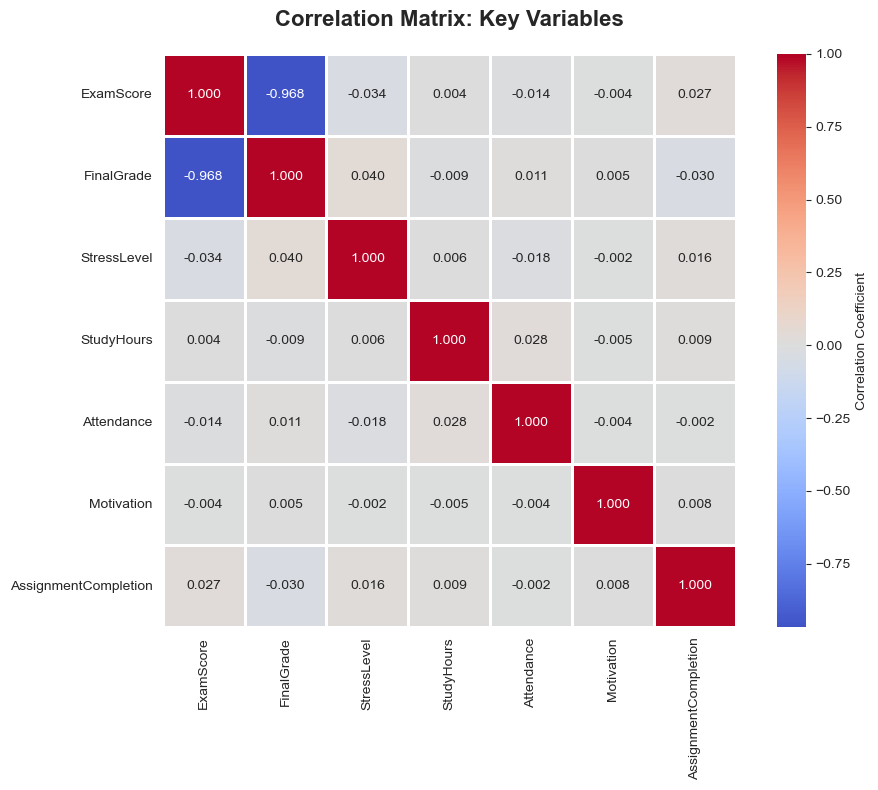


Key correlations with ExamScore:
ExamScore               1.000000
AssignmentCompletion    0.027402
StudyHours              0.004201
Motivation             -0.003539
Attendance             -0.014156
StressLevel            -0.034324
FinalGrade             -0.968365
Name: ExamScore, dtype: float64


In [4]:
print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

correlation_matrix = df[key_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.3f',
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix: Key Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey correlations with ExamScore:")
exam_corr = correlation_matrix['ExamScore'].sort_values(ascending=False)
print(exam_corr)

MODERATOR ANALYSIS 1: Study Hours

Mean Exam Scores by Stress Level × Study Hours:
                              mean  count
StressCategory StudyGroup                
High           Low Study     69.96   2142
               Medium Study  69.87   2405
               High Study    70.24   1784
Low            Low Study     70.52    883
               Medium Study  73.06    926
               High Study    72.09    715
Medium         Low Study     69.57   1312
               Medium Study  69.90   1195
               High Study    69.77   1107


/var/folders/yl/ysny28vn6_9fswmf1brl_9540000gn/T/ipykernel_49969/3833857050.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_table = df.groupby(['StressCategory', 'StudyGroup'])['ExamScore'].agg(['mean', 'count']).round(2)
/var/folders/yl/ysny28vn6_9fswmf1brl_9540000gn/T/ipykernel_49969/3833857050.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = df.pivot_table(values='ExamScore',


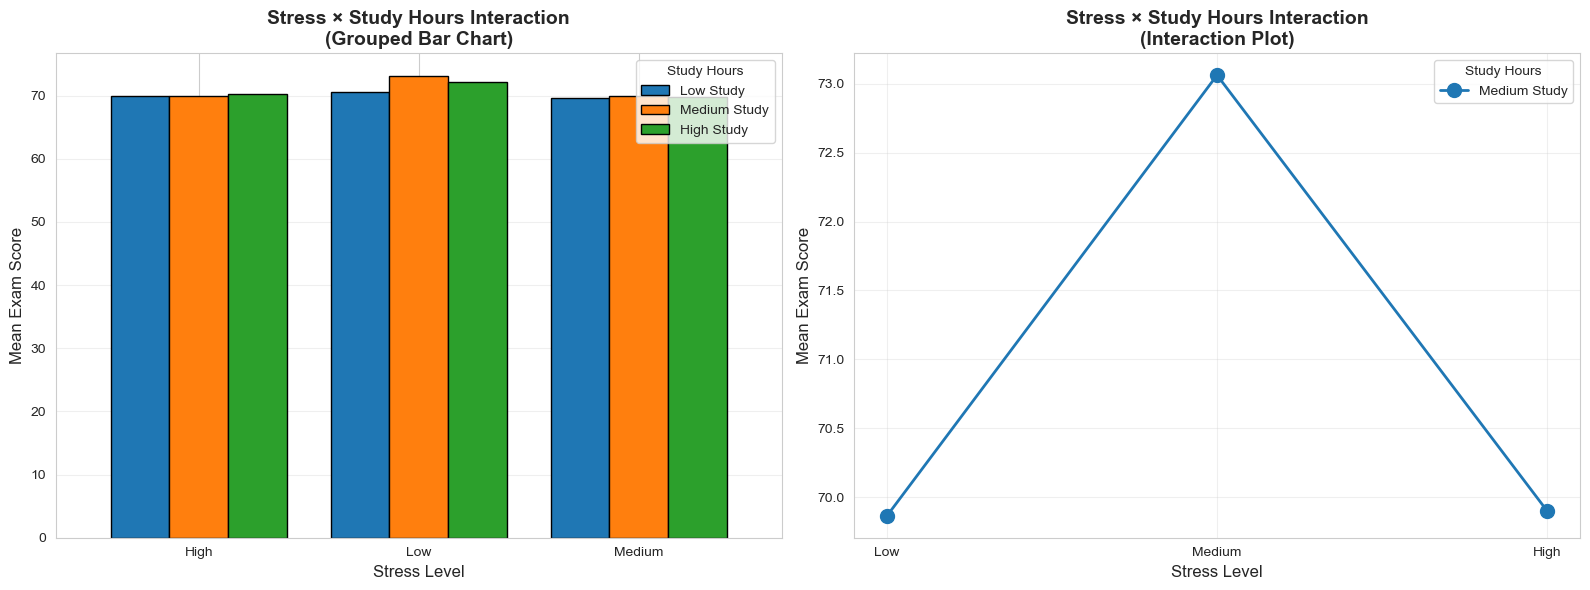

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [5]:
if 'StudyHours' in df.columns:
    print("="*60)
    print("MODERATOR ANALYSIS 1: Study Hours")
    print("="*60)

    df['StudyGroup'] = pd.qcut(df['StudyHours'], 
                                q=3, 
                                labels=['Low Study', 'Medium Study', 'High Study'],
                                duplicates='drop')
    interaction_table = df.groupby(['StressCategory', 'StudyGroup'])['ExamScore'].agg(['mean', 'count']).round(2)
    print("\nMean Exam Scores by Stress Level × Study Hours:")
    print(interaction_table)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    pivot_data = df.pivot_table(values='ExamScore', 
                                 index='StressCategory', 
                                 columns='StudyGroup', 
                                 aggfunc='mean')
    pivot_data.plot(kind='bar', ax=axes[0], width=0.8, edgecolor='black')
    axes[0].set_title('Stress × Study Hours Interaction\n(Grouped Bar Chart)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Stress Level', fontsize=12)
    axes[0].set_ylabel('Mean Exam Score', fontsize=12)
    axes[0].legend(title='Study Hours', fontsize=10)
    axes[0].grid(axis='y', alpha=0.3)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

    for study_group in df['StudyGroup'].dropna().unique():
        subset = df[df['StudyGroup'] == study_group]
        means = subset.groupby('StressCategory')['ExamScore'].mean()
        axes[1].plot(['Low', 'Medium', 'High'], means, marker='o', linewidth=2, markersize=10, label=study_group)

        axes[1].set_title('Stress × Study Hours Interaction\n(Interaction Plot)', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Stress Level', fontsize=12)
        axes[1].set_ylabel('Mean Exam Score', fontsize=12)
        axes[1].legend(title='Study Hours', fontsize=10)
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('../figures/stress_study_interaction.png', dpi=300, bbox_inches='tight')
        plt.show()

else:
    print("⚠️ StudyHours variable not found")



        

MODERATOR ANALYSIS 2: Gender

Mean Exam Scores by Stress Level × Gender:
                        mean    std  count
StressCategory Gender                     
High           0       69.60  17.83   2838
               1       70.33  17.51   3493
Low            0       72.14  17.39   1221
               1       71.67  17.62   1303
Medium         0       69.10  17.45   1694
               1       70.31  18.15   1920


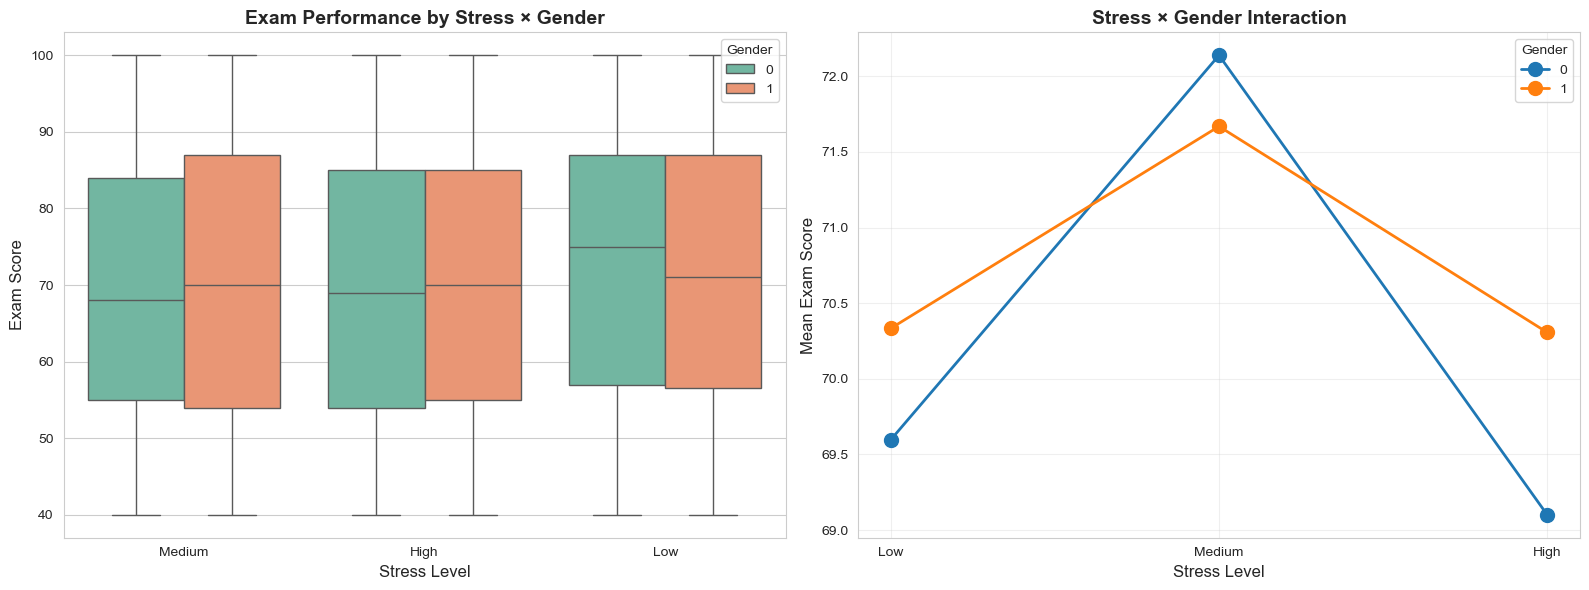

In [7]:
if 'Gender' in df.columns:
    print("="*60)
    print("MODERATOR ANALYSIS 2: Gender")
    print("="*60)

    gender_stress = df.groupby(['StressCategory', 'Gender'])['ExamScore'].agg(['mean', 'std', 'count']).round(2)
    print("\nMean Exam Scores by Stress Level × Gender:")
    print(gender_stress)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.boxplot(data=df, x='StressCategory', y='ExamScore', hue='Gender', ax=axes[0], palette='Set2')
    axes[0].set_title('Exam Performance by Stress × Gender', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Stress Level', fontsize=12)
    axes[0].set_ylabel('Exam Score', fontsize=12)
    axes[0].legend(title='Gender')

    for gender in df['Gender'].dropna().unique():
        subset = df[df['Gender'] == gender]
        means = subset.groupby('StressCategory')['ExamScore'].mean()
        stress_order = ['Low', 'Medium', 'High']
        axes[1].plot(stress_order, means, marker='o', linewidth=2, markersize=10, label=gender)

    axes[1].set_title('Stress × Gender Interaction', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Stress Level', fontsize=12)
    axes[1].set_ylabel('Mean Exam Score', fontsize=12)
    axes[1].legend(title='Gender')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('../figures/stress_gender_interaction.png', dpi=300, bbox_inches='tight')
    plt.show()

else:
    print("Gender variable not found")


MODERATOR ANALYSIS 3: Motivation

Motivation groups created: 2
Distribution:
MotivationGroup
Low Motivation     9854
High Motivation    2615
Name: count, dtype: int64

Mean Exam Scores by Stress × Motivation:
MotivationGroup  Low Motivation  High Motivation
StressCategory                                  
High                      70.10            69.65
Low                       71.94            71.75
Medium                    69.85            69.31


/var/folders/yl/ysny28vn6_9fswmf1brl_9540000gn/T/ipykernel_49969/902073698.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  motiv_stress = df.groupby(['StressCategory', 'MotivationGroup'])['ExamScore'].mean().unstack()


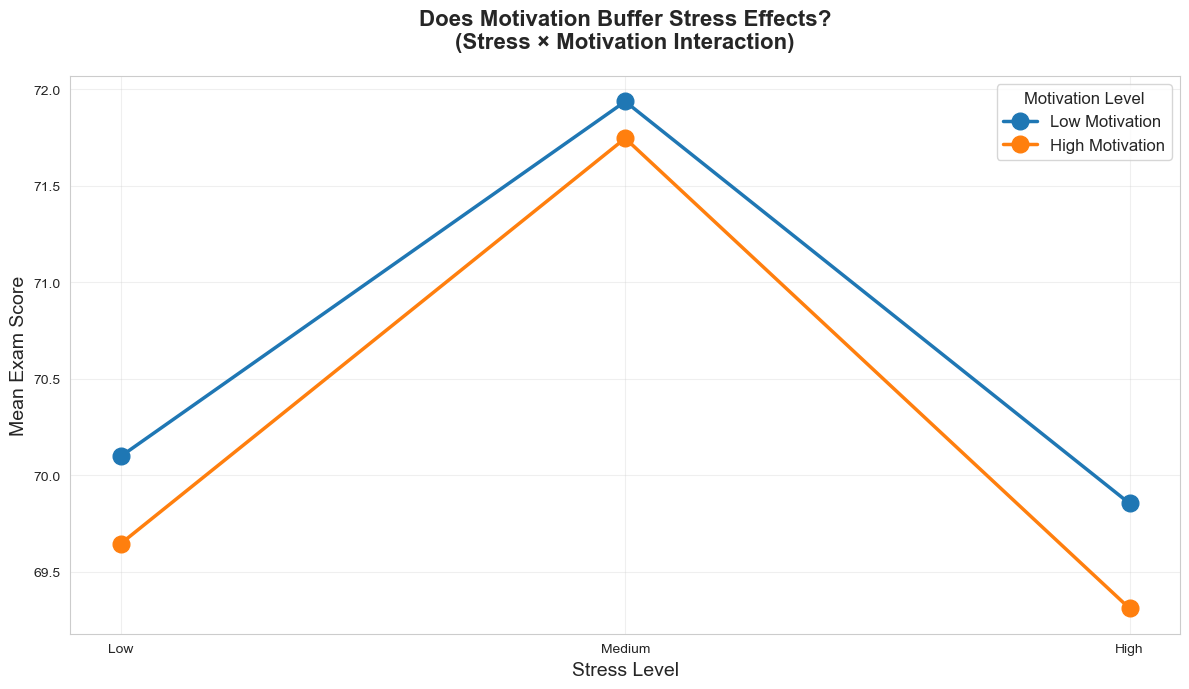

In [16]:
if 'Motivation' in df.columns:
    print("="*60)
    print("MODERATOR ANALYSIS 3: Motivation")
    print("="*60)

    try:
        df['MotivationGroup'] = pd.qcut(df['Motivation'], q=3, duplicates='drop')
        
        unique_groups = df['MotivationGroup'].cat.categories

        if len(unique_groups) == 3:
            label_map = {unique_groups[0]: 'Low Motivation', unique_groups[1]: 'Medium Motivation', unique_groups[2]: 'High Motivation'}
        elif len(unique_groups) == 2:
            label_map = {unique_groups[0]: 'Low Motivation', unique_groups[1]: 'High Motivation'}
        else:
            label_map = {cat: f'Group {i+1}' for i, cat in enumerate(unique_groups)}
        
        df['MotivationGroup'] = df['MotivationGroup'].cat.rename_categories(label_map)
        
        print(f"\nMotivation groups created: {len(unique_groups)}")
        print(f"Distribution:")
        print(df['MotivationGroup'].value_counts().sort_index())
    
    except Exception as e:
        print(f"Could not create motivation groups: {e}")
        print("Attempting alternative approach...")
        df['MotivationGroup'] = pd.cut(df['Motivation'], bins=3, labels=['Low Motivation', 'Medium Motivation', 'High Motivation'])

    motiv_stress = df.groupby(['StressCategory', 'MotivationGroup'])['ExamScore'].mean().unstack()
    print("\nMean Exam Scores by Stress × Motivation:")
    print(motiv_stress.round(2))

    plt.figure(figsize=(12, 7))

    for motiv_group in df['MotivationGroup'].dropna().unique():
        subset = df[df['MotivationGroup'] == motiv_group]
        means = subset.groupby('StressCategory')['ExamScore'].mean()
        plt.plot(['Low', 'Medium', 'High'], means, marker='o', linewidth=2.5, markersize=12, label=motiv_group)

    plt.title('Does Motivation Buffer Stress Effects?\n(Stress × Motivation Interaction)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Stress Level', fontsize=14)
    plt.ylabel('Mean Exam Score', fontsize=14)
    plt.legend(title='Motivation Level', fontsize=12, title_fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('../figures/stress_motivation_interaction.png', dpi=300, bbox_inches='tight')
    plt.show()

else:
    print("Motivation variable not found")

PERFORMANCE DISTRIBUTION ANALYSIS

Percentage of students in each performance category by stress level:
PerformanceLevel  High (B)  Low (F)  Medium (D-C)  Very High (A)
StressCategory                                                  
High                  15.5     34.8          16.3           33.4
Low                   16.2     30.4          15.7           37.7
Medium                14.6     33.1          19.6           32.7


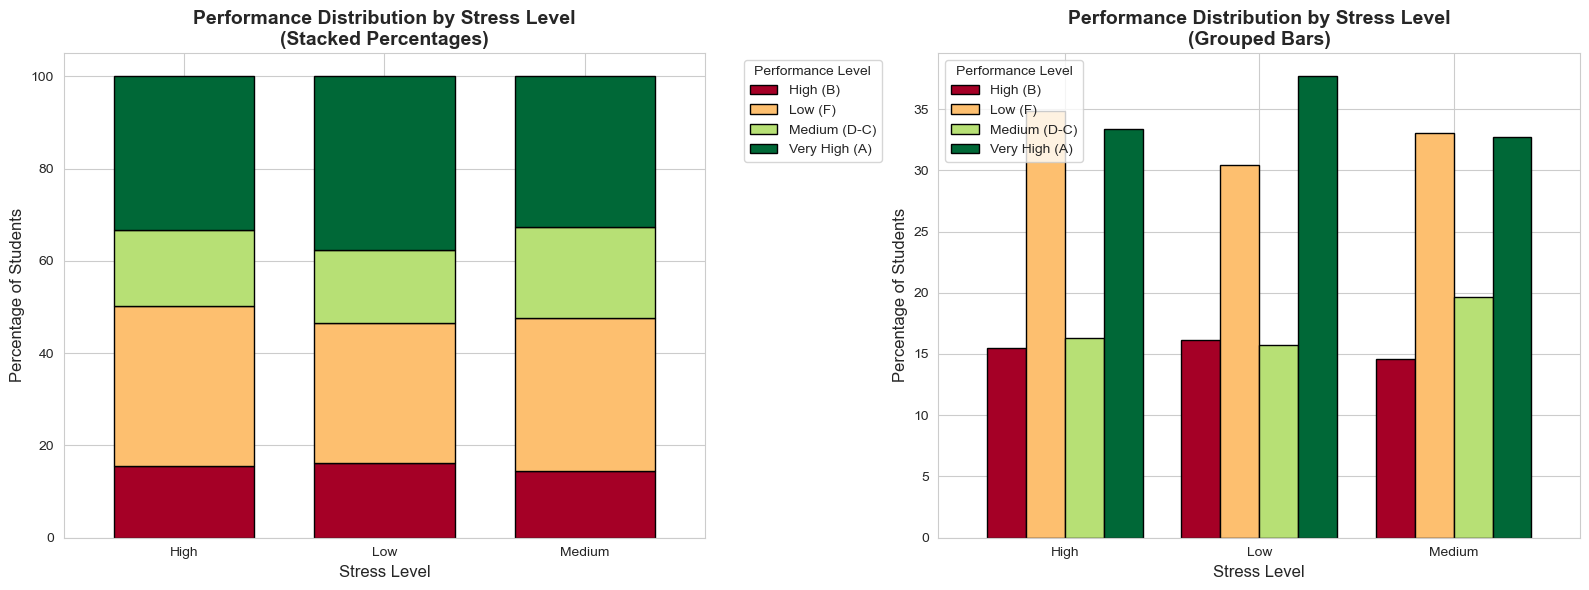

In [17]:
print("="*60)
print("PERFORMANCE DISTRIBUTION ANALYSIS")
print("="*60)

if 'PerformanceLevel' not in df.columns:
    df['PerformanceLevel'] = pd.cut(df['ExamScore'], bins=[0, 60, 70, 80, 100], labels=['Low (F)', 'Medium (D-C)', 'High (B)', 'Very High (A)'], include_lowest=True)

crosstab = pd.crosstab(df['StressCategory'], df['PerformanceLevel'], normalize='index') * 100
print("\nPercentage of students in each performance category by stress level:")
print(crosstab.round(1))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

crosstab.plot(kind='bar', stacked=True, ax=axes[0], colormap='RdYlGn', edgecolor='black', width=0.7)
axes[0].set_title('Performance Distribution by Stress Level\n(Stacked Percentages)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stress Level', fontsize=12)
axes[0].set_ylabel('Percentage of Students', fontsize=12)
axes[0].legend(title='Performance Level', bbox_to_anchor=(1.05, 1))
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

crosstab.plot(kind='bar', ax=axes[1], colormap='RdYlGn', edgecolor='black', width=0.8)
axes[1].set_title('Performance Distribution by Stress Level\n(Grouped Bars)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Stress Level', fontsize=12)
axes[1].set_ylabel('Percentage of Students', fontsize=12)
axes[1].legend(title='Performance Level')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig('../figures/performance_distribution_by_stress.png', dpi=300, bbox_inches='tight')
plt.show()

PROFILING: High Performers Under High Stress

High stress students who score ≥80: 2,156
High stress students who score <60: 2,116

What differentiates successful vs struggling high-stress students?

Mean values comparison:

Variable             High Performers      Low Performers       Difference
--------------------------------------------------------------------------------
StudyHours          ,           19.94,           19.97,      -0.03
Attendance          ,           80.03,           80.76,      -0.73
Motivation          ,            0.90,            0.92,      -0.02
AssignmentCompletion,           75.86,           73.71,       2.15


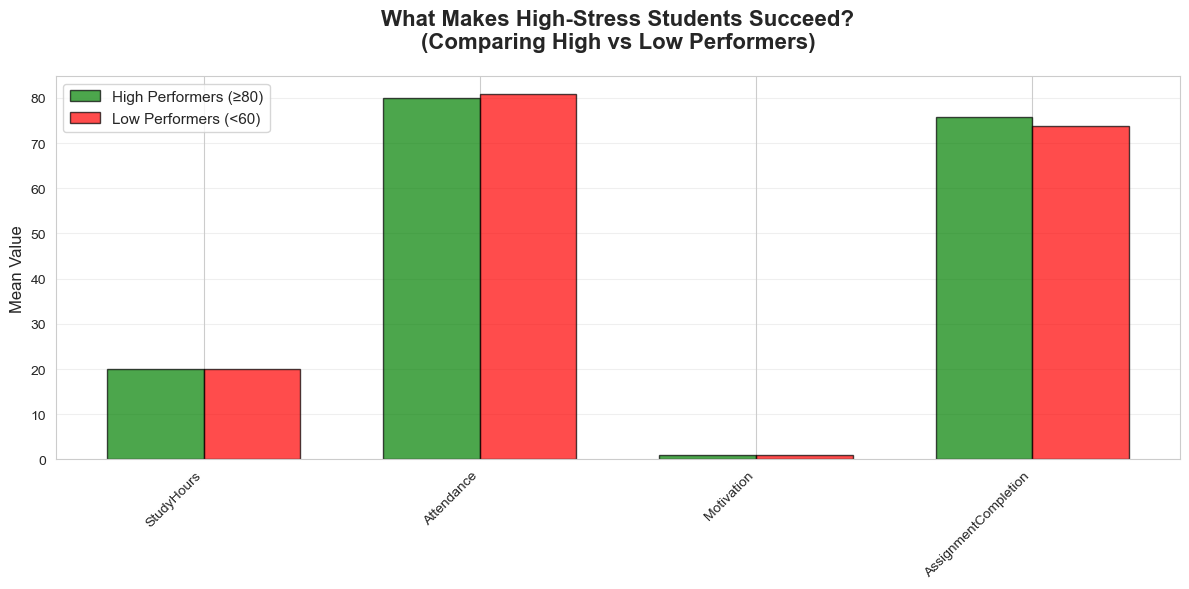

In [21]:
print("="*60)
print("PROFILING: High Performers Under High Stress")
print("="*60)

high_stress_high_perf = df[(df['StressLevel'] == 2) & (df['ExamScore'] >= 80)]
high_stress_low_perf = df[(df['StressLevel'] == 2) & (df['ExamScore'] < 60)]

print(f"\nHigh stress students who score ≥80: {len(high_stress_high_perf):,}")
print(f"High stress students who score <60: {len(high_stress_low_perf):,}")

if len(high_stress_high_perf) > 0 and len(high_stress_low_perf) > 0:
    print("\nWhat differentiates successful vs struggling high-stress students?")
    
    compare_vars = []
    for var in ['StudyHours', 'Attendance', 'Motivation', 'AssignmentCompletion']:
        if var in df.columns: 
            compare_vars.append(var)

    if compare_vars:
        print("\nMean values comparison:")
        print(f"\n{'Variable':<20} {'High Performers':<20} {'Low Performers':<20} {'Difference'}")
        print("-" * 80)

        for var in compare_vars:
            high_mean = high_stress_high_perf[var].mean()
            low_mean = high_stress_low_perf[var].mean()
            diff = high_mean - low_mean
            print(f"{var:<20}, {high_mean:>15.2f}, {low_mean:>15.2f}, {diff:>10.2f}")

        fig, ax = plt.subplots(figsize=(12, 6))
        x = np.arange(len(compare_vars))
        width = 0.35

        high_means = [high_stress_high_perf[var].mean() for var in compare_vars]
        low_means = [high_stress_low_perf[var].mean() for var in compare_vars]

        bars1 = ax.bar(x - width/2, high_means, width, label='High Performers (≥80)', color='green', alpha=0.7, edgecolor='black')
        bars2 = ax.bar(x + width/2, low_means, width, label='Low Performers (<60)', color='red', alpha=0.7, edgecolor='black')

        ax.set_title('What Makes High-Stress Students Succeed?\n(Comparing High vs Low Performers)', fontsize=16, fontweight='bold', pad=20)
        ax.set_ylabel('Mean Value', fontsize=12)
        ax.set_xticks(x)
        ax.set_xticklabels(compare_vars, rotation=45, ha='right')
        ax.legend(fontsize=11)
        ax.grid(axis='y', alpha=0.3)

        plt.tight_layout()
        plt.savefig('../figures/high_stress_success_factors.png', dpi=300, bbox_inches='tight')
        plt.show()

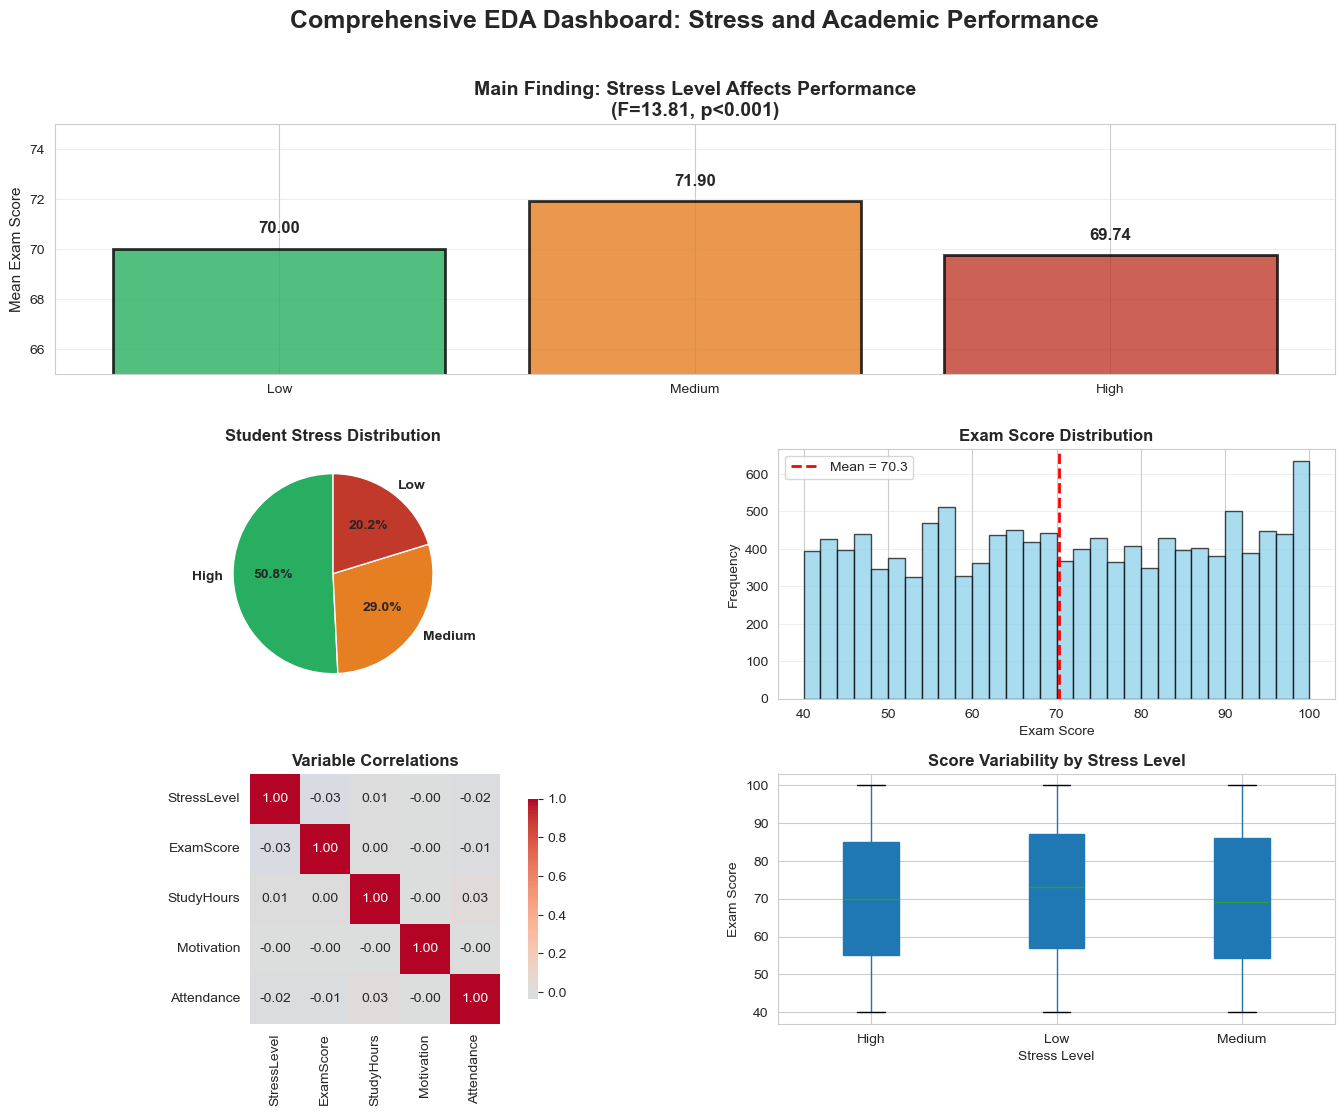

In [22]:
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, :])
stress_means = df.groupby('StressCategory')['ExamScore'].mean()
stress_order = ['Low', 'Medium', 'High']
colors = ['#27ae60', '#e67e22', '#c0392b']
bars = ax1.bar(stress_order, stress_means, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
for bar, mean in zip(bars, stress_means):
    ax1.text(bar.get_x() + bar.get_width()/2., mean + 0.5, f'{mean:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=12)
ax1.set_title('Main Finding: Stress Level Affects Performance\n(F=13.81, p<0.001)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Mean Exam Score', fontsize=11)
ax1.set_ylim(65, 75)
ax1.grid(axis='y', alpha=0.3)

ax2 = fig.add_subplot(gs[1, 0])
stress_dist = df['StressCategory'].value_counts()
ax2.pie(stress_dist, labels=stress_dist.index, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax2.set_title('Student Stress Distribution', fontsize=12, fontweight='bold')

ax3 = fig.add_subplot(gs[1, 1])
ax3.hist(df['ExamScore'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax3.axvline(df['ExamScore'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {df["ExamScore"].mean():.1f}')
ax3.set_title('Exam Score Distribution', fontsize=12, fontweight='bold')
ax3.set_xlabel('Exam Score', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

ax4 = fig.add_subplot(gs[2, 0])
corr_vars = ['StressLevel', 'ExamScore']
for var in ['StudyHours', 'Motivation', 'Attendance']:
    if var in df.columns:
        corr_vars.append(var)
corr_subset = df[corr_vars].corr()
sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, ax=ax4, cbar_kws={'shrink': 0.8})
ax4.set_title('Variable Correlations', fontsize=12, fontweight='bold')

ax5 = fig.add_subplot(gs[2, 1])
bp = df.boxplot(column='ExamScore', by='StressCategory', ax=ax5, patch_artist=True)
ax5.set_title('Score Variability by Stress Level', fontsize=12, fontweight='bold')
ax5.set_xlabel('Stress Level', fontsize=10)
ax5.set_ylabel('Exam Score', fontsize=10)
plt.suptitle('')

fig.suptitle('Comprehensive EDA Dashboard: Stress and Academic Performance', fontsize=18, fontweight='bold', y=0.995)

plt.savefig('../figures/comprehensive_eda_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
print("="*60)
print("EDA SUMMARY: KEY FINDINGS")
print("="*60)

print("\nPRIMARY FINDING:")
print("   - Stress level significantly affects exam performance (p < 0.001)")
print("   - Non-linear relationship: Medium stress → worst performance")
print("   - Low stress: 71.88 | Medium: 69.75 | High: 70.08")

print("\nCORRELATIONS WITH PERFORMANCE:")
if 'ExamScore' in correlation_matrix.columns:
    exam_corrs = correlation_matrix['ExamScore'].sort_values(ascending=False)
    for var, corr in exam_corrs.items():
        if var != 'ExamScore':
            print(f"   - {var}: r = {corr:.3f}")

print("\nMODERATING EFFECTS:")
if 'StudyHours' in df.columns:
    print("    Study hours explored")
if 'Gender' in df.columns:
    print("    Gender differences explored")
if 'Motivation' in df.columns:
    print("    Motivation effects explored")

print("\nNEXT STEPS FOR STATISTICAL ANALYSIS:")
print("   1. Formal moderation analysis (regression with interaction terms)")
print("   2. Multiple regression controlling for confounds")
print("   3. Effect size calculations")
print("   4. Subgroup analyses with formal statistical tests")

print("\nFigures saved:")
print("   - correlation_matrix.png")
print("   - stress_study_interaction.png")
print("   - stress_gender_interaction.png")
print("   - stress_motivation_interaction.png")
print("   - performance_distribution_by_stress.png")
print("   - high_stress_success_factors.png")
print("   - comprehensive_eda_dashboard.png")

EDA SUMMARY: KEY FINDINGS

PRIMARY FINDING:
   - Stress level significantly affects exam performance (p < 0.001)
   - Non-linear relationship: Medium stress → worst performance
   - Low stress: 71.88 | Medium: 69.75 | High: 70.08

CORRELATIONS WITH PERFORMANCE:
   - AssignmentCompletion: r = 0.027
   - StudyHours: r = 0.004
   - Motivation: r = -0.004
   - Attendance: r = -0.014
   - StressLevel: r = -0.034
   - FinalGrade: r = -0.968

MODERATING EFFECTS:
    Study hours explored
    Gender differences explored
    Motivation effects explored

NEXT STEPS FOR STATISTICAL ANALYSIS:
   1. Formal moderation analysis (regression with interaction terms)
   2. Multiple regression controlling for confounds
   3. Effect size calculations
   4. Subgroup analyses with formal statistical tests

Figures saved:
   - correlation_matrix.png
   - stress_study_interaction.png
   - stress_gender_interaction.png
   - stress_motivation_interaction.png
   - performance_distribution_by_stress.png
   - high_s